# <font color='grey'><b>Stroke Predictions</b></font>

## <font color='silver'><i>Data Cleaning</i></font>

In [1]:
# Importing numpy and pandas libraries 
import numpy as np
import pandas as pd

### <font color='lightgray'>Concatenating the data sets</font>

In [4]:
# Importing the datasets
healthcareDatasetStrokeData = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
train_table = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

# Concatenating the datasets
dataframe = pd.concat([healthcareDatasetStrokeData, train_table], axis=0, ignore_index=True)

### <font color='lightgray'>Dataframe's First Five Rows</font>

In [5]:
# head() method returns top 5 rows of the dataframe
dataframe.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <font color='lightgray'>Dataframe's Size</font>

In [6]:
# shape() method returns the number of rows and columns of the dataframe
dataframe.shape

(10220, 12)

<font color='gold'>The dataframe has 20414 rows and 12 columns.</font>

### <font color='lightgray'>Categorcial Columns' Unique Values</font>

In [7]:
# unique() method returns the unique values of the column

# Gender column
print(dataframe['gender'].unique())
# Martial Status column
print(dataframe['ever_married'].unique())
# Work Type column
print(dataframe['work_type'].unique())
# Residence Type column
print(dataframe['Residence_type'].unique())
# Smoking Status column
print(dataframe['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### <font color='lightgray'>Statistical Info</font>

In [8]:
# describe() method returns the statistical summary of the dataframe
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10220.0,36517.829354,21160.686189,67.00,17740.00,36932.000,54695.00,72940.00
age,10220.0,43.226614,22.611540,0.08,25.00,45.000,61.00,82.00
hypertension,10220.0,0.097456,0.296592,0.00,0.00,0.000,0.00,1.00
heart_disease,10220.0,0.054012,0.226052,0.00,0.00,0.000,0.00,1.00
avg_glucose_level,10220.0,106.147677,45.281344,55.12,77.24,91.885,114.09,271.74
bmi,9818.0,28.893237,7.853667,10.30,23.50,28.100,33.10,97.60
stroke,10220.0,0.048728,0.215309,0.00,0.00,0.000,0.00,1.00


### <font color='lightgray'>Missing Values</font>

In [9]:
# isnull() method returns the number of missing values in each column
dataframe.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  402
smoking_status         0
stroke                 0
dtype: int64

<font color='gold'>The 'bmi' (body-mass index) column is the only column with missing entries (201 entry).</font>

<b>To fill the missing values, The approch that is going to be adapted is filtering the data by age ranges and filling each missing value with the average BMI in that range in order to achieve more accuracy.</b>

In [10]:
# Defining the age ranges and labels
age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Creating a new column 'age_range' and assigning the age range of each person
dataframe['age_range'] = pd.cut(dataframe['age'], bins=[r[0] for r in age_ranges] + [age_ranges[-1][1]], labels=age_labels)

# Calculating the mean of bmi for each age range
grouped_data = dataframe.groupby('age_range')['bmi'].mean()

# Filling the missing values of bmi with the mean of bmi of the corresponding age range
for age_range, avg_bmi in zip(grouped_data.index, grouped_data.values):
    dataframe.loc[(dataframe['age_range'] == age_range) & (dataframe['bmi'].isna()), 'bmi'] = round(avg_bmi, 2)

/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/1669062343.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataframe.groupby('age_range')['bmi'].mean()


<font color='gray'>Checking for null values</font>

In [11]:
dataframe.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_range            0
dtype: int64

<font color='grey'>The process was successful</font>

### <font color='lightgray'>Duplicated Rows</font>

In [12]:
# duplicated() method returns the number of duplicate rows
dataframe.duplicated().sum()

5110

<font color='gold'>The dataframe has no duplicate rows.</font>

## <font color='silver'><i>Data Visualization</i></font>

In [13]:
# import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

### <font color='lightgray'>Categorical Data</font>

<font color='lightgreen'>Since the dataset is large, the graphs are only going to be giving a general overview. So the method groupby() is going to be used to get the exact values of individuals with or without a stroke.</font>

<font color='gray'>Hypertension Plot</font>

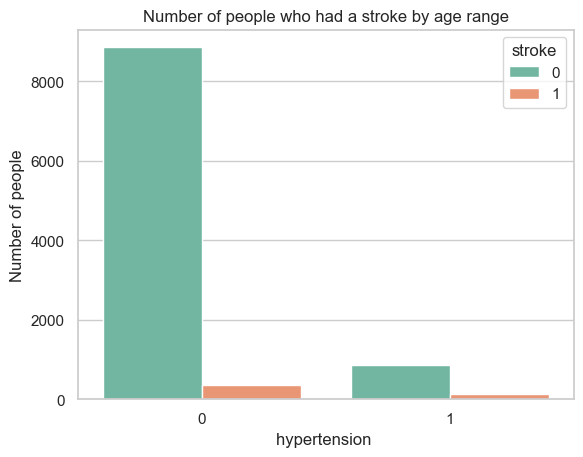

In [14]:
# set the style of the plot
sns.set(style="whitegrid")

# plotting the graph
hypertension_graph = sns.countplot(x="hypertension", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
hypertension_graph.set_title('Number of people who had a stroke by age range')
hypertension_graph.set_xlabel('hypertension ')
hypertension_graph.set_ylabel('Number of people')

# save the plot
hypertension_graph.figure.savefig('hypertension_graph.png')

In [15]:
# Number of people with or without hypertension and stroke 
dataframe['stroke'].groupby(dataframe['hypertension']).value_counts()

hypertension  stroke
0             0         8858
              1          366
1             0          864
              1          132
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals <b>without</b> hypertension have a <b>higher</b> risk of having a stroke.</font>

<font color='gray'>Heart Disease Plot</font>

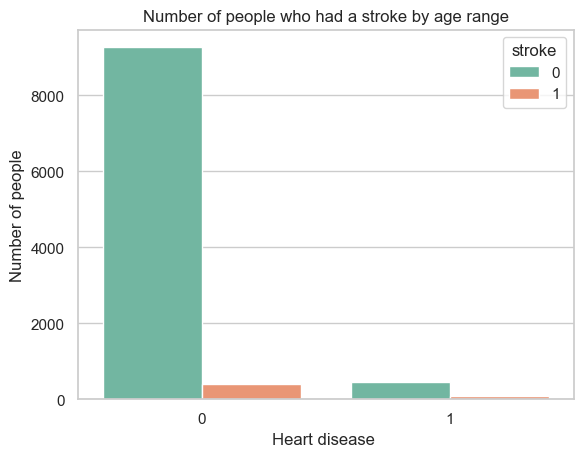

In [16]:
# plotting the graph
heart_disease_graph = sns.countplot(x="heart_disease", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
heart_disease_graph.set_title('Number of people who had a stroke by age range')
heart_disease_graph.set_xlabel('Heart disease ')
heart_disease_graph.set_ylabel('Number of people')

# save the plot
heart_disease_graph.figure.savefig('heart_disease_graph.png')

In [17]:
# Number of people with or without heart disease and stroke
dataframe['stroke'].groupby(dataframe['heart_disease']).value_counts()

heart_disease  stroke
0              0         9264
               1          404
1              0          458
               1           94
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals <b>without</b> a heart disease have a <b>higher</b> risk of having a stroke.</font>

<font color='gray'>Age Range Plot</font>

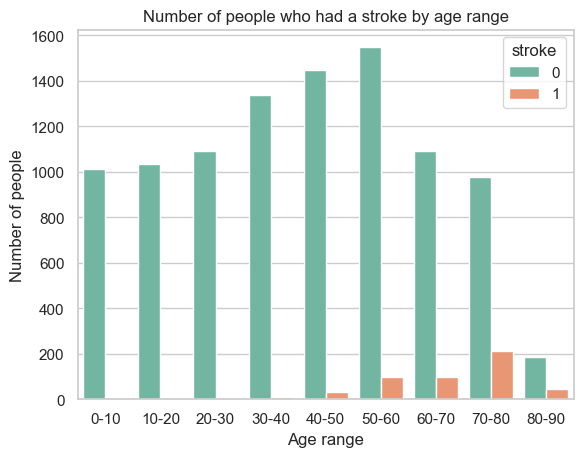

In [18]:
# plotting the graph
age_range_graph = sns.countplot(x="age_range", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
age_range_graph.set_title('Number of people who had a stroke by age range')
age_range_graph.set_xlabel('Age range')
age_range_graph.set_ylabel('Number of people')

# save the plot
age_range_graph.figure.savefig('age_range_graph.png')

In [19]:
# Number of people who had a stroke by age range
dataframe['stroke'].groupby(dataframe['age_range']).value_counts()

/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/1094516152.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataframe['stroke'].groupby(dataframe['age_range']).value_counts()


age_range  stroke
0-10       0         1012
           1            2
10-20      0         1034
           1            2
20-30      0         1090
           1            0
30-40      0         1336
           1           12
40-50      0         1448
           1           30
50-60      0         1548
           1           98
60-70      0         1090
           1           98
70-80      0          978
           1          210
80-90      0          186
           1           46
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals whose ages are between <b>70 and 80</b> years old have the <b>highest</b> risk of having a stroke.</font>

<font color='gray'>Gender Plot</font>

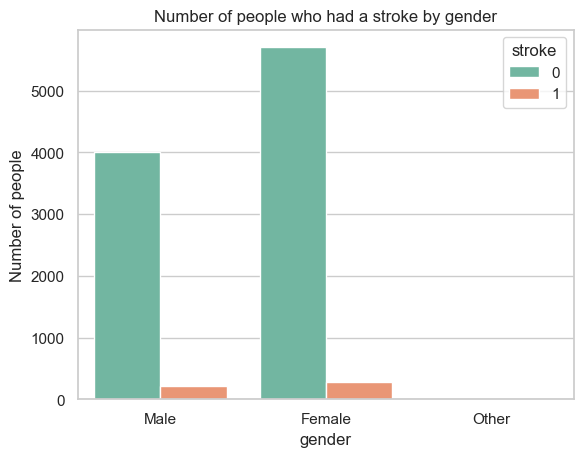

In [20]:
# plotting the graph
gender_graph = sns.countplot(x="gender", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
gender_graph.set_title('Number of people who had a stroke by gender')
gender_graph.set_xlabel('gender')
gender_graph.set_ylabel('Number of people')

# save the plot
gender_graph.figure.savefig('gender_graph.png')

In [21]:
# Number of people who had a stroke by gender
dataframe['stroke'].groupby(dataframe['gender']).value_counts()

gender  stroke
Female  0         5706
        1          282
Male    0         4014
        1          216
Other   0            2
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, <b>Female</b> individuals have a <b>higher</b> risk of having a stroke.</font>

<font color='gray'>Martial Status Plot</font>

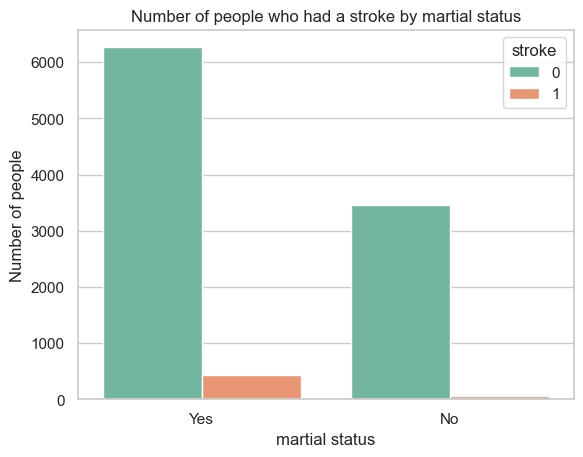

In [22]:
# plotting the graph
martial_status_graph = sns.countplot(x="ever_married", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
martial_status_graph.set_title('Number of people who had a stroke by martial status')
martial_status_graph.set_xlabel('martial status')
martial_status_graph.set_ylabel('Number of people')

# save the plot
martial_status_graph.figure.savefig('martial_status_graph.png')

In [23]:
# Number of people who had a stroke by martial status
dataframe['stroke'].groupby(dataframe['ever_married']).value_counts()

ever_married  stroke
No            0         3456
              1           58
Yes           0         6266
              1          440
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals who are <b>married</b> have a <b>higher</b> risk of having a stroke.</font>

<font color='gray'>Work Type Plot</font>

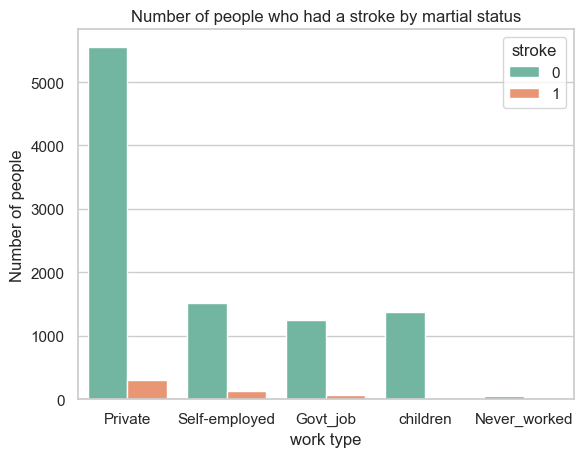

In [24]:
# plotting the graph
work_type_graph = sns.countplot(x="work_type", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
work_type_graph.set_title('Number of people who had a stroke by martial status')
work_type_graph.set_xlabel('work type')
work_type_graph.set_ylabel('Number of people')

# save the plot
work_type_graph.figure.savefig('work_type_graph.png')

In [25]:
# Number of people who had a stroke by work type
dataframe['stroke'].groupby(dataframe['work_type']).value_counts()

work_type      stroke
Govt_job       0         1248
               1           66
Never_worked   0           44
Private        0         5552
               1          298
Self-employed  0         1508
               1          130
children       0         1370
               1            4
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals work in <b>Private sector</b> have a <b>higher</b> risk of having a stroke.</font>

<font color='gray'>Residence Type Plot</font>

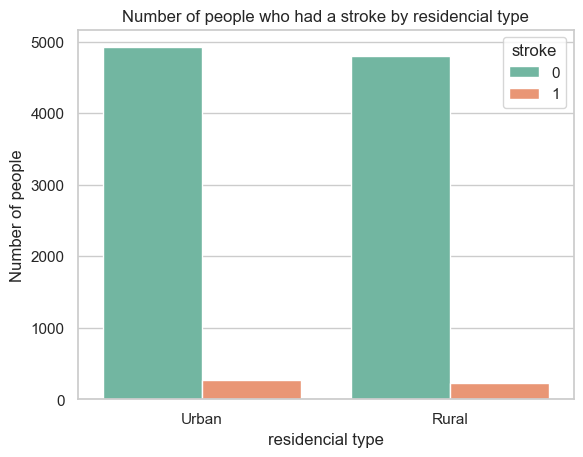

In [26]:
# plotting the graph
residence_type_graph = sns.countplot(x="Residence_type", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
residence_type_graph.set_title('Number of people who had a stroke by residencial type')
residence_type_graph.set_xlabel('residencial type')
residence_type_graph.set_ylabel('Number of people')

# save the plot
residence_type_graph.figure.savefig('residence_type_graph.png')

In [27]:
# Number of people who had a stroke by residence type
dataframe['stroke'].groupby(dataframe['Residence_type']).value_counts()

Residence_type  stroke
Rural           0         4800
                1          228
Urban           0         4922
                1          270
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, the risk of having a stroke is <b>almost equal</b> for individuals who live in urban or rural areas.</font>

<font color='gray'>Smoking Status Plot</font>

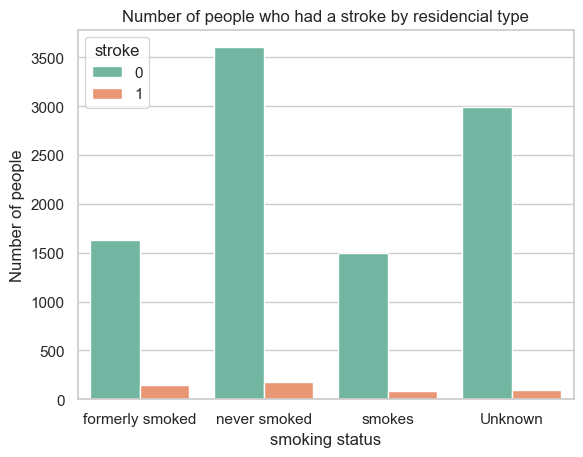

In [28]:
# plotting the graph
smoking_status_graph = sns.countplot(x="smoking_status", hue="stroke", data=dataframe, palette="Set2")

# set the plot title and labels
smoking_status_graph.set_title('Number of people who had a stroke by residencial type')
smoking_status_graph.set_xlabel('smoking status')
smoking_status_graph.set_ylabel('Number of people')

# save the plot
smoking_status_graph.figure.savefig('smoking_status_graph.png')

In [29]:
# Number of people who had a stroke by smoking status
dataframe['stroke'].groupby(dataframe['smoking_status']).value_counts()

smoking_status   stroke
Unknown          0         2994
                 1           94
formerly smoked  0         1630
                 1          140
never smoked     0         3604
                 1          180
smokes           0         1494
                 1           84
Name: count, dtype: int64

<font color='gold'>Accroding to the dataset, individuals who <b>never smoked</b> have a <b>higher</b> risk of having a stroke.</font>

<font color='orange'>Which majority of the people who have never smoked got a higher risk of a stroke? </font>

In [30]:
# Number of females who never smoked and had a stroke
dataframe[(dataframe['gender'] == 'Female') & (dataframe['smoking_status'] == 'never smoked') & (dataframe['stroke'] == 1)].value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status  stroke  age_range
491    Female  74.0  0             0              Yes           Self-employed  Urban           74.96              26.6  never smoked    1       70-80        2
58978  Female  70.0  0             1              Yes           Private        Rural           239.07             26.1  never smoked    1       60-70        2
37651  Female  69.0  1             1              No            Self-employed  Urban           72.17              36.8  never smoked    1       60-70        2
38829  Female  82.0  0             0              Yes           Private        Rural           59.32              33.2  never smoked    1       80-90        2
39373  Female  82.0  1             0              Yes           Self-employed  Urban           196.92             22.2  never smoked    1       80-90        2
                                                   

<font color='green'>The majority of people who have never smoked yet got a risk of a stroke are females. Which makes sense since on one hand smoking highers the risk of a stroke. And on the other hand females got a higher risk of having a stroke.</font>

### <font color='lightgray'>Numerical Data</font>

<font color='gray'>BMI Plot</font>

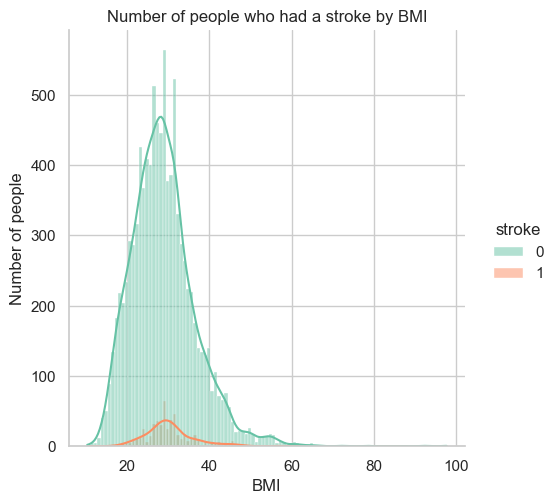

In [31]:
# plotting the graph
bmi_plot = sns.displot(x="bmi", hue="stroke", data=dataframe, palette="Set2", kde = True)

# set the plot title and labels
bmi_plot.set(title='Number of people who had a stroke by BMI')
bmi_plot.set(xlabel='BMI')
bmi_plot.set(ylabel='Number of people')

# save the plot
bmi_plot.savefig('bmi_plot.png')

<font color='gold'>Accroding to the dataset, Individuals' BMI who got a stroke is normally distributed where 95% of the values are between 20 and 40.</font>

<font color='gray'>Glucose Level Plot</font>

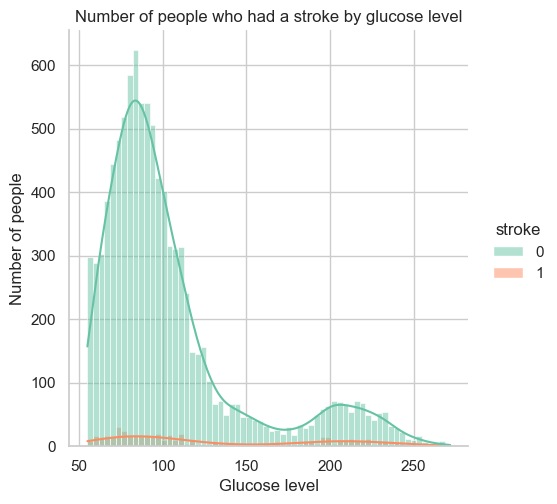

In [32]:
# plotting the graph
glucose_level_plot = sns.displot(x="avg_glucose_level", hue="stroke", data=dataframe, palette="Set2", kde = True)

# set the plot title and labels
glucose_level_plot.set(title='Number of people who had a stroke by glucose level')
glucose_level_plot.set(xlabel='Glucose level')
glucose_level_plot.set(ylabel='Number of people')

# save the plot
glucose_level_plot.savefig('glucose_level_plot.png')

<font color='gold'>Accroding to the dataset, Individuals' whose average glucose level is between 50 and 100 have a higher risk of a stroke.</font>

## <font color='silver'><i>Data Modeling</i></font>

### <font color='lightgray'>Creating a copy of the data frame</font>

In [33]:
# copy the dataframe
train_set = dataframe.copy()

# drop the age range column
train_set = train_set.drop(['age_range'], axis=1)

<font color='lightgreen'><b>In order to use Linear Regression, the values in the categorcial data should be converted to numerical values.</b></font>

<font color='Silver'>That will be done by creating dictonnaries to map the categorical values to numeric values and then replacing the values into the dataframe.</font>

### <font color='lightgray'>Train Set Values</font>

In [34]:
# create a dictionary to map the values
work_type_dict = {'Private': 1, 'Govt_job': 2, 'Self-employed': 3, 'children': 4, 'Never_worked': 5}
smoking_status_dict = {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 4}
gender_dict = {'Male': 1, 'Female': 2, 'Other': 3}
residence_type_dict = {'Urban': 1, 'Rural': 2}
martial_dict = {'Yes': 1, 'No': 2}

# replace the values
train_set['work_type'] = train_set['work_type'].replace(work_type_dict)
train_set['smoking_status'] = train_set['smoking_status'].replace(smoking_status_dict)
train_set['gender'] = train_set['gender'].replace(gender_dict)
train_set['Residence_type'] = train_set['Residence_type'].replace(residence_type_dict)
train_set['ever_married'] = train_set['ever_married'].replace(martial_dict)

/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/4162418501.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['work_type'] = train_set['work_type'].replace(work_type_dict)
/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/4162418501.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['smoking_status'] = train_set['smoking_status'].replace(smoking_status_dict)
/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/4162418501.py:11: FutureWarning: Downcasting behavior i

### <font color='lightgray'>Test Set Values</font>

In [54]:
# read the test set
test_set = pd.read_csv('datasets/test_data.csv')
test_table = pd.read_csv('datasets/test_data.csv')

# Concatenating the datasets
dataframe_test = pd.concat([test_set, test_table], axis=0, ignore_index=True)

# create a dictionary to map the values
work_type_dict = {'Private': 1, 'Govt_job': 2, 'Self-employed': 3, 'children': 4, 'Never_worked': 5}
smoking_status_dict = {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 4}
gender_dict = {'Male': 1, 'Female': 2, 'Other': 3}
residence_type_dict = {'Urban': 1, 'Rural': 2}
martial_dict = {'Yes': 1, 'No': 2}

# Display the transposed DataFrame
dataframe_test.head()
# replace the values in dataframe_test
dataframe_test['work_type'] = dataframe_test['work_type'].replace(work_type_dict)
dataframe_test['smoking_status'] = dataframe_test['smoking_status'].replace(smoking_status_dict)
dataframe_test['gender'] = dataframe_test['gender'].replace(gender_dict)
dataframe_test['Residence_type'] = dataframe_test['Residence_type'].replace(residence_type_dict)
dataframe_test['ever_married'] = dataframe_test['ever_married'].replace(martial_dict)

/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/3380235350.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_test['work_type'] = dataframe_test['work_type'].replace(work_type_dict)
/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/3380235350.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_test['smoking_status'] = dataframe_test['smoking_status'].replace(smoking_status_dict)
/var/folders/hc/74bmkd4951n2z4crcc57v9780000gn/T/ipykernel_78775/3380235350.py:20: FutureWarning: D

### <font color='lightgray'>Checking if the changes were applied</font>

In [55]:
# head of the train set
train_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.60,1,1
1,51676,2,61.0,0,0,1,3,2,202.21,30.96,2,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.50,2,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.40,3,1
4,1665,2,79.0,1,0,1,3,2,174.12,24.00,2,1


In [56]:
# head of the test set
test_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


### <font color='lightgray'>Predicting the Stroke Risk</font>

In [70]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

In [71]:
# One-hot encode the categorical features in both training and test sets
train_features = pd.get_dummies(train_set.drop('stroke', axis=1))
test_features = pd.get_dummies(test_set)

# Align the train and test datasets, ensuring they have the same columns
train_features, test_features = train_features.align(test_features, join='left', axis=1)

# Handle missing values by filling with the median (you can use mean or other strategies)
imputer = SimpleImputer(strategy='median')
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)

# Set the target for training
train_target = train_set['stroke']

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(train_features, train_target)

# Make predictions
predictions = model.predict(test_features)

# Create a dataframe with the id and predictions
output = pd.DataFrame({'id': test_set['id'], 'stroke': predictions})

# Save the dataframe to a CSV file
output.to_csv('stroke_predictions.csv', index=False)

